In [1]:
"""Data inspection. For HCP connectomes"""

'Data inspection. For HCP connectomes'

In [9]:
import csv
import importlib
import os

import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

import analyze
importlib.reload(analyze)
import datasets
importlib.reload(datasets)
import vis
importlib.reload(vis)

DATA_DIR = '/neuro/'
DATA_TYPE = 'conn'

IMG_SHAPE = (15, 15)
SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
TRAIN_DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_%s_%s.npy' % (
        'train', DATA_TYPE, SHAPE_STR))
VAL_DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_%s_%s.npy' % (
        'val', DATA_TYPE, SHAPE_STR))

DATASET_PATH = TRAIN_DATASET_PATH
DATASET = np.load(DATASET_PATH)

OUTPUT = '/scratch/users/nmiolane/imoutput_connectomes/latent_dim_80'
CMAP = 'Spectral'

From: https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf

1. netmats1: Using "full" normalized temporal correlation between every node timeseries
and every other. This is a common approach and is very simple, but it has various
practical and interpretational disadvantages [Smith 2012].
2. netmats2: Using partial temporal correlation between nodes' timeseries. This aims to
estimate direct connection strengths better than achieved by full correlation. To slightly
improve the estimates of partial correlation coefficients, a small amount of L2
regularization is applied (setting rho=0.01 in the Ridge Regression netmats option in
FSLNets) [Smith OHBM 2014, FSLNets]. 

In [3]:
dataset, _ = datasets.get_dataset_connectomes(IMG_SHAPE)

Loading /neuro/train_val_datasets/train_conn_15x15.npy...
Loading /neuro/train_val_datasets/val_conn_15x15.npy...


In [4]:
print(dataset.shape)
print(np.min(dataset))
print(np.max(dataset))

(771, 1, 15, 15)
-0.8269070808850013
1.0


Loading /neuro/train_val_datasets/train_conn_15x15.npy
Dataset shape: (771, 1, 15, 15)


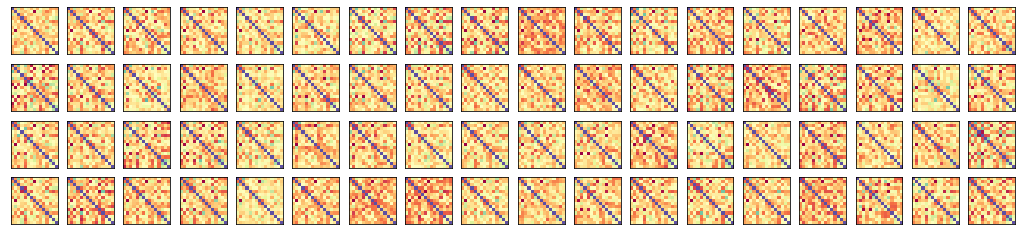

In [5]:
vis.show_data(DATASET_PATH, cmap=CMAP)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_60/train_vae/epoch_159_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_60/train_vae/epoch_159_checkpoint.pth.


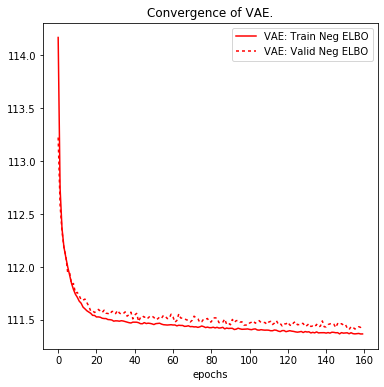

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax = vis.plot_convergence(ax, OUTPUT, algo_name='vae', crit_name='neg_elbo')

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_60/train_vae/epoch_159_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_60/train_vae/epoch_159_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_60/train_vae/epoch_159_checkpoint.pth.


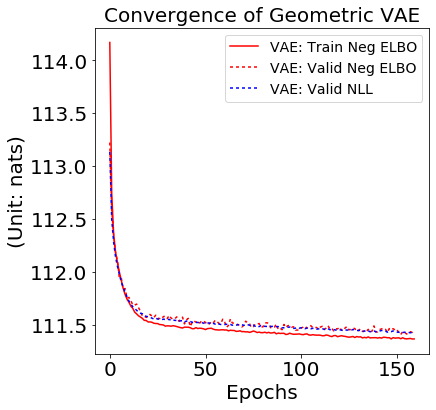

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax = vis.plot_convergence(ax, OUTPUT, algo_name='vae', crit_name='neg_elbo')
ax = vis.plot_criterion(ax, OUTPUT, algo_name='vae', crit_name='neg_loglikelihood', mode='val', dashes=True)
ax.set_title('Convergence of Geometric VAE', fontsize=20)
ax.set_xlabel('Epochs', fontsize=20)
ax.set_ylabel('(Unit: nats)', fontsize=20)

ax.legend(fontsize=14)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax = vis.plot_criterion(ax, OUTPUT, algo_name='vae', crit_name='neg_loglikelihood', mode='val', dashes=True)

Loading /neuro/train_val_datasets/train_conn_15x15.npy
Dataset shape: (771, 1, 15, 15)
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_100/train_vae/epoch_159_checkpoint.pth.
Loading encoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_100/train_vae/epoch_159_checkpoint.pth.
Loading decoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_100/train_vae/epoch_159_checkpoint.pth.
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
[[ 0.88748091 -0.21480364]
 [-0.21480364  0.88544948]]
[[ 0.88788082 -0.21528813]
 [-0.21528813  0.88529683]]
[[ 0.8875753  -0.21408774]
 [-0.21408774  0.88473235]]
[[ 0.88753449 -0.2143874 ]
 [-0.2143874   0.88474133]]
[[ 0.88743915 -0.21437128]
 [-0.21437128  0.88482723]]


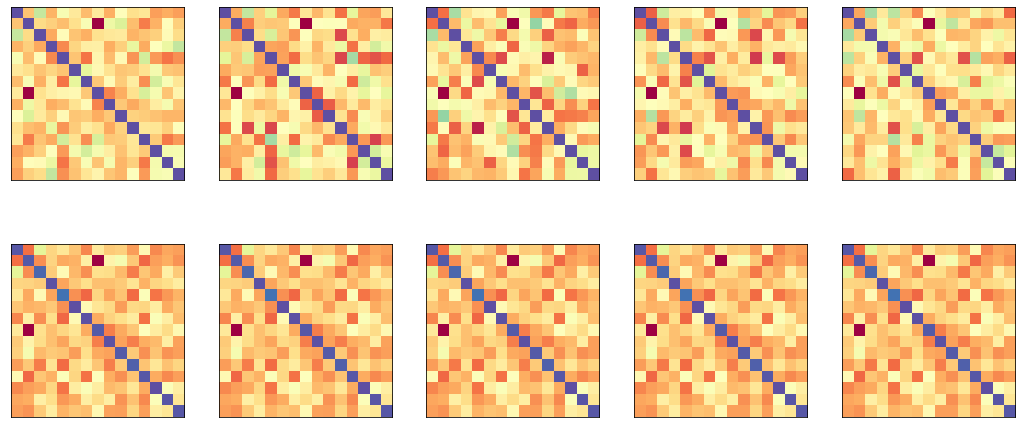

In [74]:
vis.show_img_and_recon(OUTPUT, DATASET_PATH, cmap=CMAP)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_100/train_vae/epoch_159_checkpoint.pth.
Loading decoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_100/train_vae/epoch_159_checkpoint.pth.


/home/user/miniconda/envs/py36/lib/python3.7/site-packages/torch/tensor.py:339: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


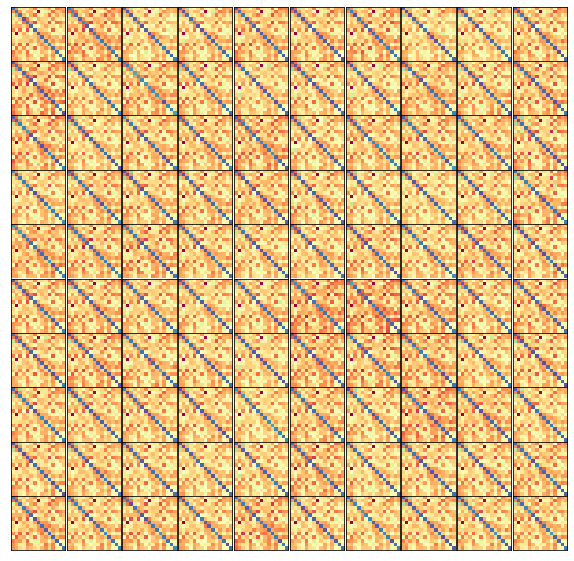

In [75]:
fig = plt.figure(figsize=(10, 10))
outer = gridspec.GridSpec(1, 1, wspace=0.1, hspace=0.1)

for i, algo_name in enumerate(['vae']):
    vis.show_samples_from_prior(
        OUTPUT, fig, outer, i, algo_name=algo_name, cmap=CMAP)
fig.show()

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_10/train_vae/epoch_159_checkpoint.pth.
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_10/train_vae/epoch_159_checkpoint.pth.
Loading encoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_20/train_vae/epoch_159_checkpoint.pth.
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_20/train_vae/epoch_159_checkpoint.pth.
Loading encoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_40/train_vae/epoch_159_checkpoint.pth.
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
Found checkpoint. Getting: /scratc

Text(0.5, 1.0, 'PCA on latent space')

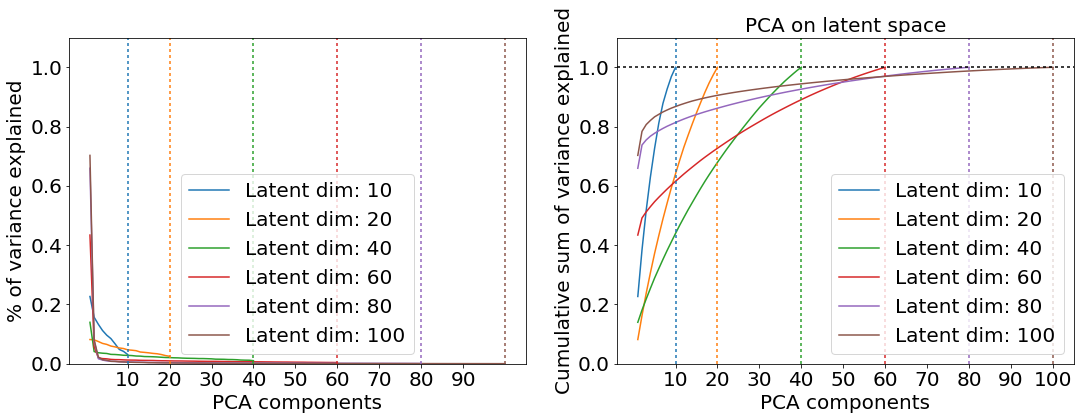

In [119]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

all_latent_dims = [10, 20, 40, 60, 80, 100]
for latent_dim in all_latent_dims:
    output = '/scratch/users/nmiolane/imoutput_connectomes/latent_dim_%d' % latent_dim

    ax = vis.plot_variance_explained(output, DATASET_PATH, axes=axes)

    
#ax.set_title('Variance explained', fontsize=20)
#
#ax.set_ylabel('(Unit: nats)', fontsize=20)
 
axes[0].set_xlabel('PCA components', fontsize=20)
axes[0].set_ylabel('% of variance explained', fontsize=20)
axes[0].legend(fontsize=20)
axes[0].tick_params(axis='x', labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)
axes[0].locator_params(axis='y', nbins=6)
axes[0].xaxis.set_ticks(np.arange(10, 100, 10))


axes[1].set_xlabel('PCA components', fontsize=20)
axes[1].set_ylabel('Cumulative sum of variance explained', fontsize=20)
axes[1].legend(fontsize=20, loc='lower right')
axes[1].locator_params(axis='y', nbins=6)
axes[1].xaxis.set_ticks(np.arange(10, 110, 10))
axes[1].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)

for i_dim, latent_dim in enumerate(all_latent_dims):
    axes[0].axvline(x=latent_dim, color='C%d' % i_dim, dashes=[2, 2])
    axes[1].axvline(x=latent_dim, color='C%d' % i_dim, dashes=[2, 2])
axes[1].axhline(y=1., color='black', dashes=[2, 2])
axes[1].set_title('PCA on latent space', fontsize=20)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_10/train_vae/epoch_159_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_20/train_vae/epoch_159_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_40/train_vae/epoch_159_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_60/train_vae/epoch_159_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_80/train_vae/epoch_159_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_100/train_vae/epoch_159_checkpoint.pth.
[111.57181753763338, 111.55657493777392, 111.47720188047828, 111.44487632193217, 111.38973515208174, 111.38289865633337]


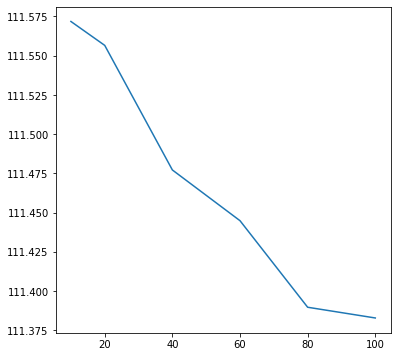

In [17]:
all_latent_dims = [10, 20, 40, 60, 80, 100]
neg_iwelbos = []
for latent_dim in all_latent_dims:
    output = '/scratch/users/nmiolane/imoutput_connectomes/latent_dim_%d' % latent_dim
    val_losses = vis.load_losses(
                output, 'vae', crit_name='neg_elbo',
                epoch_id=int(159), mode='val')
    neg_iwelbos.append(val_losses[159])
        
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.plot(all_latent_dims, neg_iwelbos)
print(neg_iwelbos)

In [13]:
def get_hcp(labels_path):
    labels = {}
    labels['Gender'] = []
    labels['Age'] = []
    with open(labels_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        for i_row, row in enumerate(reader):
            if i_row == 0:
                continue
            labels['Gender'].append(row[1])
            labels['Age'].append(row[2])

    return labels

In [14]:
labels = get_hcp('/neuro/train_val_datasets/hcp_labels.csv')

In [15]:
COLORS_GENDER = {'F': 'green', 'M': 'blue'}
COLORS_AGE = {'22-25': 'yellow', '26-30': 'orange', '31-35': 'red', '36+':'purple'}

COLORS = {'Gender': COLORS_GENDER, 'Age': COLORS_AGE}

def plot_connectomes(ax, output=OUTPUT, dataset_path=DATASET_PATH, 
              labels_path='/neuro/train_val_datasets/hcp_labels.csv', 
              n_pcs=2, label_name='Gender'):
    labels = get_hcp(labels_path)
    colored_labels = labels[label_name]
    
    mus = analyze.latent_projection(output, dataset_path)

    _, projected_mus = analyze.pca_projection(mus, n_pcs)
    colors = COLORS[label_name]
    for mu, colored_label in zip(projected_mus, colored_labels):
        if n_pcs == 2:
            im = ax.scatter(mu[0], mu[1], c=colors[colored_label], s=8)
        else:
            im = ax.scatter(mu[0], mu[1], mu[2], c=colors[colored_label])
    return im, ax

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_80/train_vae/epoch_159_checkpoint.pth.
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_80/train_vae/epoch_159_checkpoint.pth.
Loading encoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_80/train_vae/epoch_159_checkpoint.pth.
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
numpy
<class 'numpy.ndarray'>
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes/latent_dim_80/train_vae/epoch_159_checkpoint.pth.
Loading encoder from network of architecture: fc...


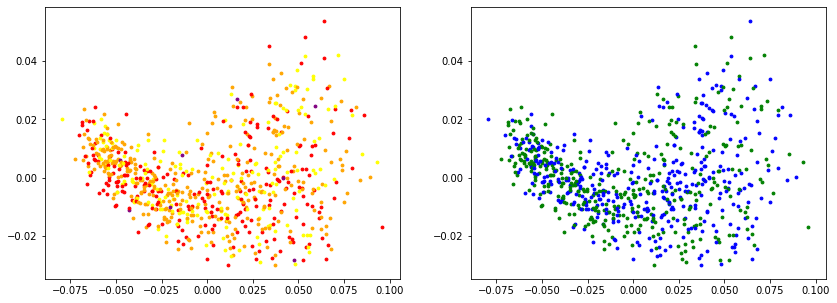

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax = axes[0]
im, ax = plot_connectomes(ax, label_name='Age')

ax = axes[1]
im, ax = plot_connectomes(ax, label_name='Gender')
